<img src="Pictures/Escudo_UDEA.png" width=200 height=200 style="float:right" />

## INSTITUTO DE FÍSICA
## FACULTAD DE CIENCIAS EXACTAS Y NATURALES

## Física Experimental ll: Encriptación



Juan Esteban Zapata<br>
C.C. 1193151372

### Procedimiento

1. Lea una imagen en escala de grises y conviertala en una matriz. Grafique la imagen.


2. Construya una matriz $Arg$ de números aleatorios (0.0 a 1.0) del mismo tamaño de la imagen. Convierta la matriz en una matriz de fase: $e^{(i2\pi Arg)}$. Grafique la matriz de números aleatorios.

3. Multiplique la imagen por la matriz de fase y realice la transformada de Fourier (TF). En python la TF es $np.fft.fft2(A)$.


4. Cree una matriz correspondiente al módulo cuadrado del resultado de la TF, es la imagen encriptada. Grafique esta matriz que corresponde a la intensidad. Para facilitar la visualización puede graficar potencias fraccionales del valor absoluto de la matriz.


5. Convierta en un vector la imagen original y la imagen encriptada, y realice para cada una: el histograma, determine la media y la desviación estándar, en una misma figura presente el histograma y la función de densidad normal (Gaussiana) con media y desviación estándar igual a las encontradas. Analice los resultados.


6. Para el vector correspondiente a la imagen encriptada tome un número n de posiciones de la matriz, promedie el valor de estas posiciones, y construya una nueva distribución usando los promedios. Determine la media y la desviación estándar de la distribución. Superponga una distribución normal con la misma media y desviación estándar. Analice los resultados.


7. Repita el paso anterior para al menos 5 valores de n diferentes y cada vez mayores, hasta que obtenga una distribución normal cercana a una normal. Analice los resultados.


8. Concluya a partir de los resultados.

### Resultados

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import scipy.stats as stats

Se hará la encriptación de la siguiente imagen. La composición de la intensidad de color de la imagen original está en términos del modelo RGB (**R**ed, **G**reen, **B**lue por sus siglas en inglés), es decir, los colores de la imagen son una superposición aditiva de los colores rojo, verde y azul, y por lo tanto no son tonos blancos y negros en sí. 

Para convertir la imagen a escala de grises, se realiza una transformación en la que se asignan pesos específicos a cada uno de los tres colores mencionados, y se obtiene la imagen en grises. El valor de estos pesos viene dado por la contribución de cada uno de estos valores a la intensidad de color percibida por el ojo humano, y son un estándar para la calibración de los colores en las pantallas digitales.

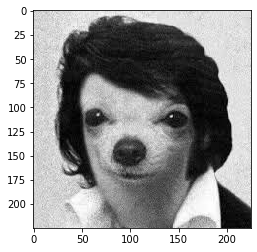

In [2]:
# Se carga la imagen
image = img.imread('Pictures/image.jpg')

# Los pesos de los colores RGB para la transformación a escala de grises
rgb_weights = [0.2989, 0.5870, 0.1140]
gray_img = np.dot(image[...,:3], rgb_weights)

# Se muestra la imagen
plt.imshow(gray_img, cmap='gray');

Ahora para encriptar la imagen, puede introducirse un ruido aleatorio a la imagen. Esto es, una matriz del mismo tamaño de la imagen original y de números aleatorios que la distorsione pixel a pixel. Esta matriz aleatoria es llamada *Matriz de fase* y representa la llave de la encriptación. 

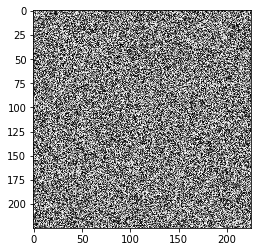

In [3]:
# Matriz de números aleatorios y del mismo tamaño que la imagen
phase_matrix = np.random.uniform(0,1,size=gray_img.shape)

plt.imshow(phase_matrix, cmap='gray')

# Matriz de fase
phase_matrix = np.exp(1j*-2*np.pi*phase_matrix)

Si se aplica la función de la transformada rápida de Fourier (**F**ast **F**ourier **T**ransform o *fft*) al producto de la imagen y la matriz de fase (esto es, la imagen con ruido aleatorio), sus pixeles son transformados al dominio de Fourier o dominio de las frecuencias. En el procesamiento digital de imágenes, se utiliza el dominio de las frecuencias para la aplicación de filtros, suavizado de la imagen, realce de bordes y colores, entre otras aplicaciones.

Cabe resaltar que la imagen con ruido aleatorio es representada como una matriz real y, una vez aplicada la transformada de Fourier, esta se presenta como una matriz compleja (en sí la transformación convierte funciones reales en funciones complejas). 

Ahora, el módulo cuadrado de la transformada es denominado **espectro de potencias** de la imagen y corresponde a la imagen encriptada.

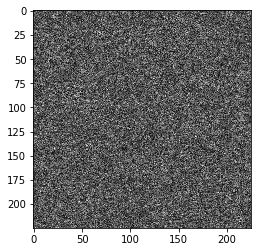

In [4]:
# Transformada de Fourier del producto de la imagen y la matriz de fase
fourier = np.fft.fft2(phase_matrix*gray_img)

# Imagen encriptada
encrypted = abs(fourier)**2

plt.imshow(encrypted**0.4, cmap='gray')

plt.show()

Si se analiza la distribución de las intensidades de color en la imagen original a través de un histograma, se encuentra que para esta imagen en específico, se presentan dos picos de frecuencia: uno en valores cercanos al cero (tonos negros) y otro más alto en valores cercanos al 200 (tonos más blancos). Esto se debe a la composición de la imagen, en la que predominan los pixeles de tonos más negros y de tonos más blancos, y no tanto los grises intermedios entre estos dos colores. 

La representación del gris en el sistema RGB es (128,128, 128), valor que se encuentra en medio del **valle** entre los picos del histograma. La media de los valores de la intensidad de color de la imagen original es de 129.28, valor muy cercano a los 128 del color gris, esto es consecuencia de la presencia de los dos picos similares en los valores extremos de blanco y negro: El color medio (gris) es también estadísticamente el valor medio de la intensidad de color de la imagen.

Si se construye una función de densidad normal con la misma media y desviación estándar, se encuentra que esta no ajusta la distribución de los colores de la imagen. Esto ocurre debido a que sus valores no corresponden a variables aleatorias ni a sumas finitas de estas.

La distribución de la intensidad de la imagen encriptada en cambio, se corresponde mejor con una dsitribución exponencial negativa, fenómeno llamadao **Ruido de Speckle**

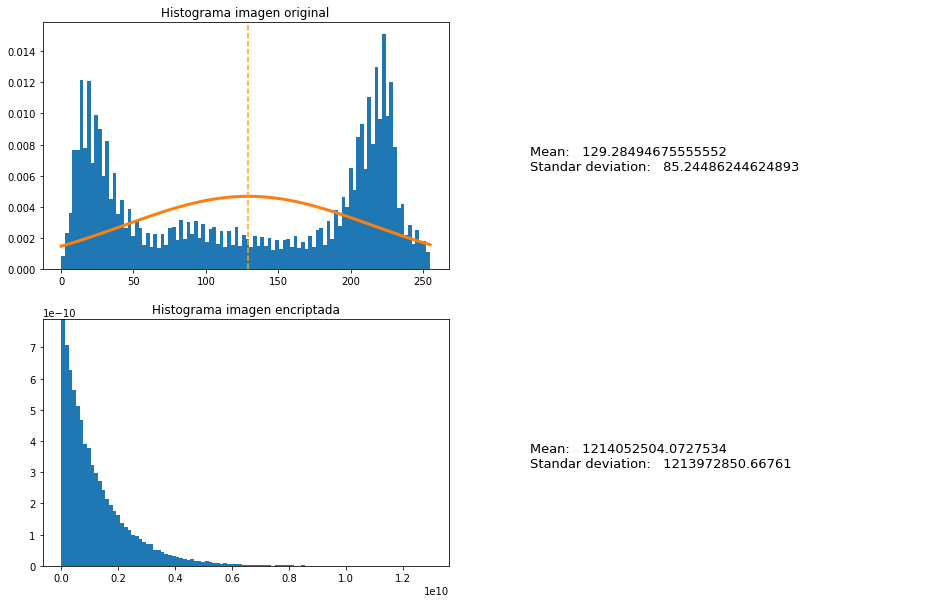

In [5]:
# Vectores de valores
gray_vect = gray_img.flatten()
encryp_vect = encrypted.flatten()


# Medias y desviaciones estándar
mu1, sigma1 = gray_vect.mean(), gray_vect.std()
mu2, sigma2 = encryp_vect.mean(), encryp_vect.std()

# Gráficos
f=plt.figure(figsize=(16,10))
ax1 = f.add_subplot(2,2,1)
ax2 = f.add_subplot(2,2,2)
ax3 = f.add_subplot(2,2,3)
ax4 = f.add_subplot(2,2,4)

ax1.hist(gray_vect, bins=100, density=True)
ax1.set_title('Histograma imagen original')
xmin, xmax = gray_vect.min(), gray_vect.max()
x = np.linspace(xmin, xmax, 100)
y = stats.norm.pdf(x, loc=mu1, scale=sigma1)
ax1.plot(x, y, linewidth=3)
ax1.axvline(mu1, c='orange', ls='--')


ax2.axis('off')
ax2.text(0,0.4,f'Mean:   {mu1}\nStandar deviation:   {sigma1}', fontsize=13)

ax3.hist(encryp_vect, bins=100, density=True)
ax3.set_title('Histograma imagen encriptada')

ax4.axis('off')
ax4.text(0,0.4,f'Mean:   {mu2}\nStandar deviation:   {sigma2}', fontsize=13)

plt.show()

Si se toma $n$ veces el promedio de $P$ valores aleatorios de la imagen encriptada, y con estos $n$ valores se construye un histograma, la distribución puede aproximarse a una distribución normal. Este hecho está garantizado por el teorema del limite central, el cual establece que si $S_n$ es el promedio de $n$ variables aleatorias independientes, y $n$ es suficientemente grande, la función de distribución se acomoda bien a una normal. 

En este ejercicio $P$ = 200, es decir, se escogen 200 valores aleatorios de la imagen encriptada y se promedian; y $n$ toma los valores de 200, 800, 2000, 9000, 20000 y 50000. 

In [6]:
# Función que calcula n promedios aleatorios con 200 datos
sample = lambda n: np.array([np.mean(np.random.choice(encryp_vect, size=200)) for i in range(n)])

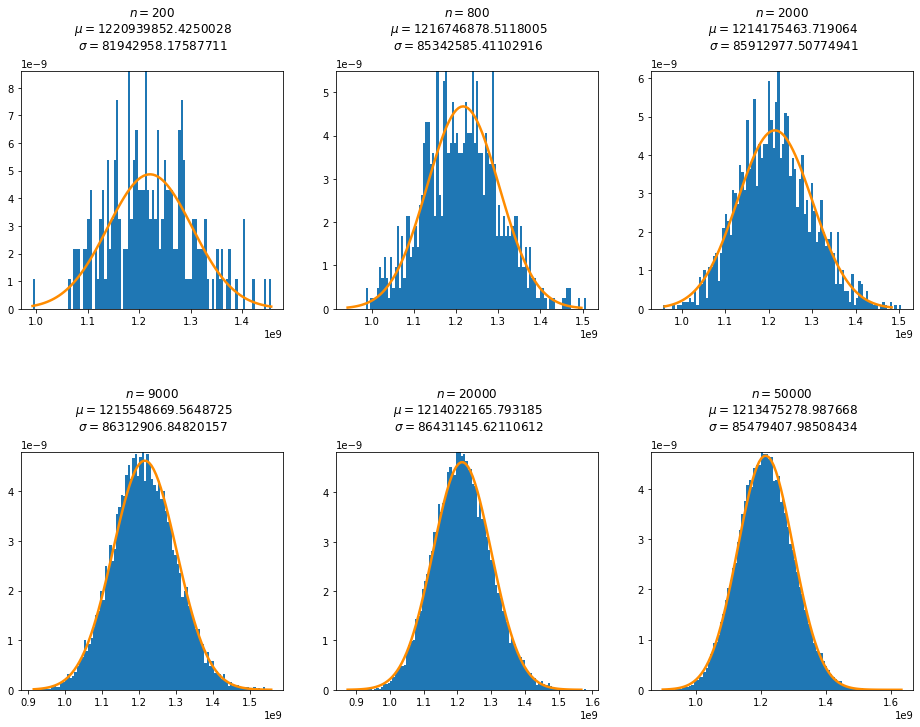

In [7]:
# Figura
f = plt.figure(figsize=(16,8))
plt.subplots_adjust(top=1.2, hspace=0.6)

# Función auxiliar para graficar
def gaussian(sample, subplot):
    mean = np.mean(sample) # Media
    std = np.std(sample) # Desviacion
    
    # Función de densidad normal con la misma media y desviación
    xmin, xmax = sample.min(), sample.max()
    x = np.linspace(xmin, xmax, 100)
    y = stats.norm.pdf(x, mean, std)
      
    subplot.set_title(f'$n=${len(sample)}\n $\mu=${mean}\n $\sigma=${std}\n')
    
    return subplot.plot(x,y, c='darkorange', linewidth=2.5)

# Muestras
sample1=sample(200)
sample2=sample(800)
sample3=sample(2000)
sample4=sample(9000)
sample5=sample(20000)
sample6=sample(50000)

# Histogramas
ax1 = f.add_subplot(2,3,1)
ax2 = f.add_subplot(2,3,2)
ax3 = f.add_subplot(2,3,3)
ax4 = f.add_subplot(2,3,4)
ax5 = f.add_subplot(2,3,5)
ax6 = f.add_subplot(2,3,6)


ax1.hist(sample1,bins=100, density=True)
gaussian(sample1, ax1)

ax2.hist(sample(800), bins=100, density=True)
gaussian(sample2, ax2)

ax3.hist(sample(2000), bins=100, density=True)
gaussian(sample3, ax3)

ax4.hist(sample(9000), bins=100, density=True)
gaussian(sample4, ax4)

ax5.hist(sample(20000), bins=100, density=True)
gaussian(sample5, ax5)

ax6.hist(sample6, bins=100, density=True)
gaussian(sample6, ax6)

plt.show()

De los histogramas puede concluirse que a medida que crece $n$ (se tienen más datos de promedios), la distribución se aproxima y se ajusta mejor una función de densidad normal con la misma media y desviación estándar que los datos con los que se construye el histograma. Como ya se dijo, este hecho está garantizado por el teorema del límite central, puesto que la selección de los datos para los promedios es puramente aleatoria, la varianza de los valores es finita y por lo tanto, satisface las condiciones del teorema.

### Complemento: Desencriptación

La imagen en realidad no está totalmente encriptada, esto puede verse al aplicar la inversa de la transformada rápida de Fourier. Como puede observarse, se recupera la imagen original.

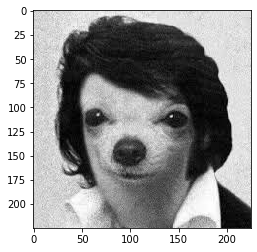

In [8]:
# Transformada inversa e imagen desencriptada
plt.imshow(abs(np.fft.ifft2(fourier)), cmap='gray')

Si se multiplica la matriz de transformada por otra matriz aleatoria de fase, sí se obtiene la imagen encriptada.

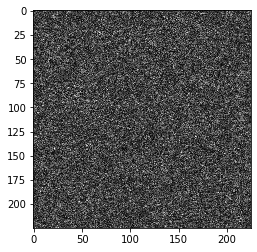

In [9]:
# Segunda matriz aleatoria de fase
phase_matrix2 = np.exp(1j*2*np.pi*np.random.random(size=gray_img.shape))

# Imagen correctamente encriptada
encrypted_img = phase_matrix2*fourier

plt.imshow(abs(encrypted_img), cmap='gray')

Si se intenta aplicar la transformada inversa a la imagen anterior, no se recupera la original. Es decir, sí quedó bien encriptada.

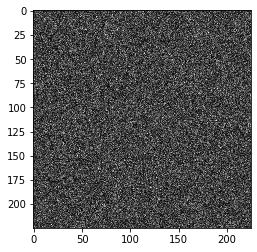

In [10]:
plt.imshow(abs(np.fft.ifft2(encrypted_img)), cmap='gray')

Esta segunda matriz de fase es la llave de la encriptación. Para restaurar la imagen original, solo hace falta multiplicar la imagen encriptada por la conjugada de la llave o matriz de fase, y aplicar la transformada inversa de Fourier.

(Notar que multiplicar la matriz de fase por su conjugada resulta en la matriz identidad)

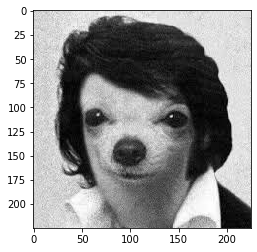

In [11]:
# Imagen correctamente desencriptada 
plt.imshow(abs(np.fft.ifft2(encrypted_img*phase_matrix2.conjugate())), cmap='gray')

En resumen, para desencriptar la imagen sólo haría falta conocer la matriz llave y multiplicar la imagen encriptada por la conjugada de esta matriz. 

### Fuentes

* https://riunet.upv.es/bitstream/handle/10251/68301/Ruiz%20-%20La%20transformada%20de%20Fourier.%20Aplicaci%C3%B3n%20al%20filtrado%20de%20im%C3%A1genes.pdf?sequence=1#:~:text=3%20La%20transformada%20de%20Fourier,esta%20idea%20a%20muchas%20escalas.


* http://www2.elo.utfsm.cl/~elo328/pdf1dpp/PDI09_Frecuencia_1dpp.pdf


* http://www6.uniovi.es/vision/intro/node19.html